In [26]:
#!pip install -U scikit-learn xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

import xgboost as xgb


In [2]:
data = pd.read_csv(r'D:\GenAi\ML\regression_models_on_avacado\avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Data Analysis

In [3]:
# Display the information about the dataset
# know the mean,median,std,min,max etc using .describe()
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [5]:
data.isnull().sum()    # check for null values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in the data


plot some graphs using data

In [6]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


C:\Users\komme\AppData\Local\Temp\ipykernel_4204\3916244917.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice'])


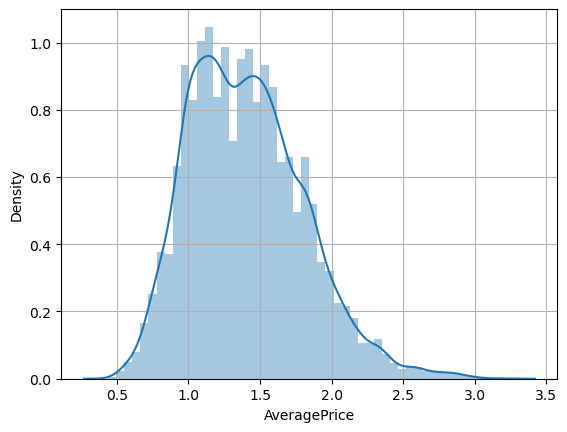

In [7]:
sns.distplot(data['AveragePrice'])
plt.grid(True)

<Axes: xlabel='year', ylabel='count'>

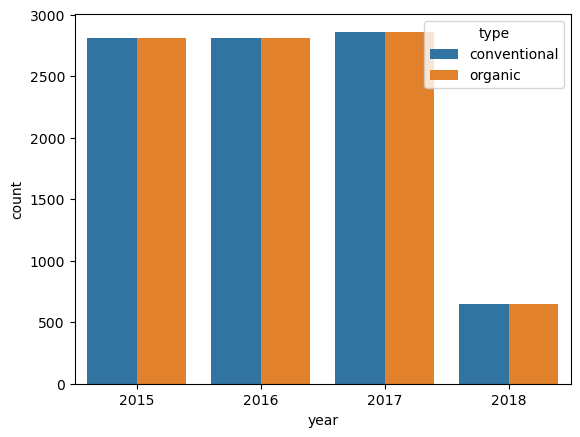

In [8]:
# count the number of bags sold in each year based on type of avocado
sns.countplot(x='year',hue='type',data=data)

<Axes: xlabel='year', ylabel='AveragePrice'>

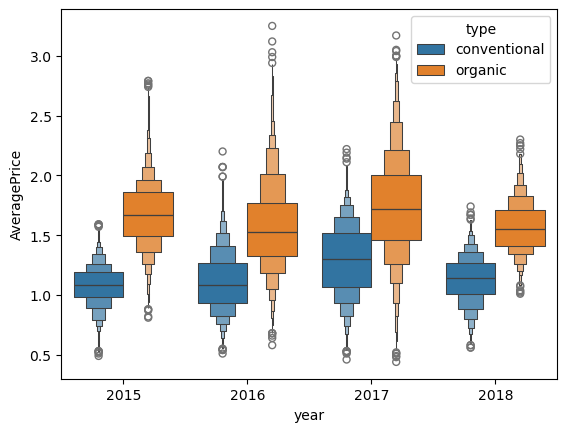

In [9]:
# Find type of avocado average price in each year 
sns.boxenplot(x='year',y='AveragePrice',hue='type',data=data)

From the above graph in 2017 more organic avocados are sold compare to other years.

In [10]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# From above code some columns donot have median and mean values so we will drop those columns if we want.
# As for now i will use all the data to get the model accuracy.
# To develop a model we need to folow some steps called ML Pipeline
   1. Split the data into dependent and independent variables
   2. Train and Test the data
   3. Select a model and Fit the trained data  
   4. Predict the data with x_test
   5. Find mean_square_error(MSE),mean_absolute_error(MAE),and r2 to find the model accuracy.
# From the data Y(Target)is 'AveragePrice' and remaining alla re X(independent variables).
# Machine Learining 

In [11]:
dummies = pd.get_dummies(data[['year','region']],drop_first=True)   # for some categorical data we need to convert them into numerical data using one-hot encoding
dummies

,year,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2015,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18245,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18246,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
18247,2018,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
X = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
y = data['AveragePrice']
print(X)
#print(y)


       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags          type  year  ...  region_SouthCarolina  \
0           93.25 

In [13]:
print(y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64


In [14]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=30,random_state=0)

#Used ratio of 70-30% for train and test the model, and to give same values for every run time  used random_state=0.


# Select the model 
 Here I used 6 algorithms to get the accuracy.

 # Before that we need to use Scaling Technique to Scale the values of data using StandardScaler

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [16]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [17]:
col_to_std =['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']
sc= StandardScaler()
X_train[col_to_std]= sc.fit_transform(X_train[col_to_std].apply(pd.to_numeric, errors='coerce').fillna(0))
X_test[col_to_std]= sc.transform(X_test[col_to_std].apply(pd.to_numeric, errors='coerce').fillna(0))

In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = {'LinearRegression':LinearRegression(),
         'KNN':KNeighborsRegressor(),
         'SVR':SVR(gamma=1),
         #'RandomForest':RandomForestRegressor,
         'Ridge':Ridge(),
         'Lasso':Lasso(),
         'ElasticNet':ElasticNet(),
         'XGBoost':xgb.XGBRegressor(),
}
for name,func in models.items():
    print(name,type(func))
    func.fit(X_train[col_to_std],y_train)
    y_pred= func.predict(X_test[col_to_std])
    print(name)
    print('Mean Absolute Error:',np.round(mean_absolute_error(y_test,y_pred),3))
    print('Mean Squared Error:',np.round(mean_squared_error(y_test,y_pred),3))
    print('R2 Score:',np.round(r2_score(y_test,y_pred),3))
    print('\n')

LinearRegression <class 'sklearn.linear_model._base.LinearRegression'>
LinearRegression
Mean Absolute Error: 0.334
Mean Squared Error: 0.161
R2 Score: 0.036


KNN <class 'sklearn.neighbors._regression.KNeighborsRegressor'>
KNN
Mean Absolute Error: 0.172
Mean Squared Error: 0.068
R2 Score: 0.593


SVR <class 'sklearn.svm._classes.SVR'>
SVR
Mean Absolute Error: 0.208
Mean Squared Error: 0.09
R2 Score: 0.458


Ridge <class 'sklearn.linear_model._ridge.Ridge'>
Ridge
Mean Absolute Error: 0.334
Mean Squared Error: 0.161
R2 Score: 0.037


Lasso <class 'sklearn.linear_model._coordinate_descent.Lasso'>
Lasso
Mean Absolute Error: 0.338
Mean Squared Error: 0.167
R2 Score: -0.005


ElasticNet <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>
ElasticNet
Mean Absolute Error: 0.338
Mean Squared Error: 0.167
R2 Score: -0.005


XGBoost <class 'xgboost.sklearn.XGBRegressor'>
XGBoost
Mean Absolute Error: 0.129
Mean Squared Error: 0.033
R2 Score: 0.8




Conclusion:
From the above results XGBoost r2_score is near to 1 ,so this is model gives the best results.